In [ ]:
!pip install keytotext -q
from keytotext import pipeline
from glob import glob
import cv2
import numpy as np
nlp = pipeline("mrm8488/t5-base-finetuned-common_gen")

     |████████████████████████████████| 800 kB 35.4 MB/s 
     |████████████████████████████████| 451 kB 71.3 MB/s 
     |████████████████████████████████| 1.3 MB 64.3 MB/s 
     |████████████████████████████████| 1.9 MB 60.0 MB/s 
     |████████████████████████████████| 182 kB 74.3 MB/s 
     |████████████████████████████████| 5.8 MB 56.8 MB/s 
     |████████████████████████████████| 212 kB 76.1 MB/s 
     |████████████████████████████████| 132 kB 65.9 MB/s 
     |████████████████████████████████| 127 kB 82.3 MB/s 
     |████████████████████████████████| 85 kB 6.1 MB/s 
     |████████████████████████████████| 237 kB 75.8 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
     |████████████████████████████████| 7.6 MB 58.2 MB/s 
     |████████████████████████████████| 512 kB 77.1 MB/s 
     |████████████████████████████████| 125 kB 75.9 MB/s 
     |████████████████████████████████| 182 kB 57.3 MB/s 
     |████████████████████████████████| 168 kB 29.1 MB/s 
     |████████████

INFO:lightning_lite.utilities.seed:Global seed set to 42


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import model_from_json
json_file=open('/content/gdrive/MyDrive/model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#loading weights into new model
loaded_model.load_weights('/content/gdrive/MyDrive/modelfinal.h5')

In [ ]:
# images_path = '../flicker/flickr8ksau/Flickr_Data/Images'
images = glob('/content/gdrive/MyDrive/flicker/flickr8k-sau/Flickr_Data/Images/'+'*.jpg')
len(images)

8091

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=True)

553467096/553467096 [==============================] - 26s 0us/step


In [ ]:
from keras.models import Model
last = model.layers[-2].output
modele = Model(inputs = model.input,outputs = last)
modele.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(4096,)
        
    img_name = i.split('/')[-1]
    print(img_name)
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1200:
        break
        
    elif count % 50 == 0:
        print(count)

1/1 [==============================] - 0s 29ms/step
385835044_4aa11f6990.jpg
1/1 [==============================] - 0s 24ms/step
373219198_149af371d9.jpg
1/1 [==============================] - 0s 26ms/step
380034515_4fbdfa6b26.jpg
1/1 [==============================] - 0s 30ms/step
385186343_464f5fc186.jpg
1/1 [==============================] - 0s 24ms/step
374176648_ba4b88c221.jpg
1/1 [==============================] - 0s 24ms/step
394563330_68b566368c.jpg
1/1 [==============================] - 0s 22ms/step
397286183_745abbf40d.jpg
1/1 [==============================] - 0s 22ms/step
390360326_26f5936189.jpg
1/1 [==============================] - 0s 26ms/step
378453580_21d688748e.jpg
1/1 [==============================] - 0s 32ms/step
3727740053_3baa94ffcb.jpg
1/1 [==============================] - 0s 26ms/step
3741462565_cc35966b7a.jpg
1/1 [==============================] - 0s 26ms/step
3738685861_8dfff28760.jpg
1/1 [==============================] - 0s 21ms/step
378170167_9b5119d918.

In [ ]:
caption_path = '/content/gdrive/MyDrive/flicker/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
len(caption_path)

91

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
print(captions_dict)

{'3512033659_7e8a0c2ffa.jpg': ['A crowd of Hindu women in headwraps .', 'A group of woman wearing scarves on their heads crowd together next to a building .', 'A street is filled with Indian people in a market .', 'Many individuals with coverings on their heads crowded together .', 'The crowds are huge as the citizens await the opening .'], '3512791890_eb065b460a.jpg': ['A girl and woman are posing while sitting on a carpeted staircase .', 'A smiling woman holds a smiling toddler in a yellow dress .', 'A woman and a young girl are happily sitting together .', 'A woman has her arm around a small girl and they are smiling .', 'a young girl and a woman smile for the camera .'], '3513265399_a32e8cfd18.jpg': ['A baseball player slides home in a non professional baseball game in an HDR photograph .', 'A child is sliding into home plate and the catcher is waiting .', 'A player is sliding into home plate with the catcher guarding it .', 'A runner is sliding into home while the cathcer covers t

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified


In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
print(captions_dict)

{'3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512791890_eb065b460a.jpg': ['startofseq a girl and woman are posing while sitting on a carpeted staircase . endofseq', 'startofseq a smiling woman holds a smiling toddler in a yellow dress . endofseq', 'startofseq a woman and a young girl are happily sitting together . endofseq', 'startofseq a woman has her arm around a small girl and they are smiling . endofseq', 'startofseq a young girl and a woman smile for the camera . endofseq'], '3513265399_a32e8cfd18.jpg': ['startofseq a baseball player slides home in a non professional baseball game in an hd

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 17ms/step
Predicted Object cat:99.725425%
Predicted Object cat:99.360019%
Predicted Object person:87.345088%
Predicted Object cat:72.942847%
Predicted Object cat:63.899708%
Predicted Object cat:58.050013%
Predicted Object dog:54.776806%


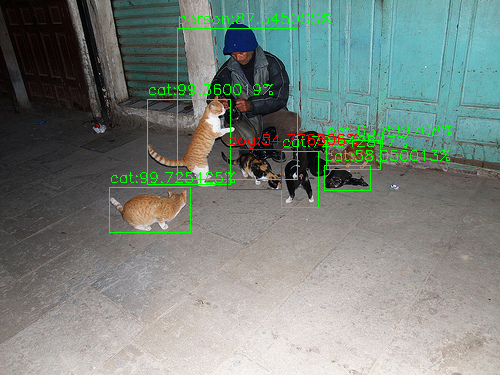

In [ ]:
    final_caption=set()

    
    test_feature = modele.predict(getImage(1120)).reshape(1,4096)
    #test_feature=test_feature.reshape(1,4096)
    test_img_path = images[1120]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 15:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=30)


        prediction = np.argmax(loaded_model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]
        final_caption.add(sampled_word)
        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
    
    import numpy as np
    import cv2

    img_to_detect = cv2.imread( test_img_path)
    img_height = img_to_detect.shape[0]
    img_width = img_to_detect.shape[1]

    img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB = True, crop = False)

    class_labels = ["person","bicycle","car","motorcycle","airplane","bus","train","truck","boat",
                        "trafficlight","firehydrant","stopsign","parkingmeter","bench","bird","cat",
                        "dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack",
                        "umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sportsball",
                        "kite","baseballbat","baseballglove","skateboard","surfboard","tennisracket",
                        "bottle","wineglass","cup","fork","knife","spoon","bowl","banana","apple",
                        "sandwich","orange","broccoli","carrot","hotdog","pizza","donut","cake","chair",
                        "sofa","pottedplant","bed","diningtable","toilet","tvmonitor","laptop","mouse",
                        "remote","keyboard","cellphone","microwave","oven","toaster","sink","refrigerator",
                        "book","clock","vase","scissors","teddybear","hairdrier","toothbrush"]

    class_colors = ["0,255,0","0,0,255","255,0,0","255,255,0","0,255,255"]
    class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
    class_colors = np.array(class_colors)
    class_colors = np.tile(class_colors,(16,1))

    yolo_model = cv2.dnn.readNetFromDarknet('/content/gdrive/MyDrive/flicker/yolov3.cfg','/content/gdrive/MyDrive/flicker/yolov3.weights')
    yolo_layers = yolo_model.getLayerNames()
    #yolo_output_layer = [yolo_layers[yolo_layer[0]-1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]
    yolo_output_layer = [yolo_layers[yolo_layer - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

    yolo_model.setInput(img_blob)
    object_detection_layers = yolo_model.forward(yolo_output_layer)

    class_ids_list = []
    boxes_lists = []
    confidence_list = [] 

    for object_detection_layer in object_detection_layers:
        for object_detection in object_detection_layer:

                all_scores = object_detection[5:]
                predicted_class_id = np.argmax(all_scores)
                prediction_confidence = all_scores[predicted_class_id]

                if prediction_confidence > 0.20:
                    predicted_class_label = class_labels[predicted_class_id]

                    bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
                    (box_centre_x_pt, box_centre_y_pt, box_width, box_height) = bounding_box.astype("int")
                    start_x_pt = int(box_centre_x_pt - (box_width/2))
                    start_y_pt = int(box_centre_y_pt - (box_height/2))

                    class_ids_list.append(predicted_class_id)
                    confidence_list.append(float(prediction_confidence))
                    boxes_lists.append([start_x_pt, start_y_pt, int(box_width), int(box_height)])

    max_value_ids = cv2.dnn.NMSBoxes(boxes_lists, confidence_list, 0.5, 0.4)

    for max_value_id in max_value_ids:
            max_value_id = max_value_id.ravel()
            max_class_id = max_value_id[0]
            box = boxes_lists[max_class_id]
            start_x_pt = box[0]
            start_y_pt = box[1]
            box_width = box[2]
            box_height = box[3]

            predicted_class_id = class_ids_list[max_class_id]
            predicted_class_label = class_labels[predicted_class_id]
            prediction_confidence = confidence_list[max_class_id]

            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height

            box_color = class_colors[predicted_class_id]
            box_color = [int(c) for c in box_color]
            final_caption.add(predicted_class_label)
            predicted_class_label = "{}:{:2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("Predicted Object {}".format(predicted_class_label))
            
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

    cv2_imshow(img_to_detect)
        



    

In [ ]:
    keywords = ['Man','Stadium','infront', 'of', 'Audience','Cricket',]



    print(final_caption)

{'dog', 'a', '.', 'cat', 'surrounded', 'endofseq', 'the', 'person', 'by', 'on', 'street', 'cats', 'man'}


In [ ]:
final_caption.remove('endofseq')
final_caption.remove('.')

print(final_caption)

{'dog', 'a', 'cat', 'surrounded', 'the', 'person', 'by', 'on', 'street', 'cats', 'man'}


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, "{'dog', 'a', 'cat', 'surrounded', 'the', 'person', 'by', 'on', 'street', 'cats', 'man'}")

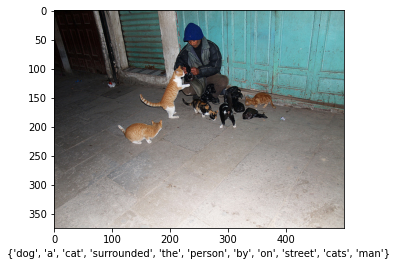

In [ ]:
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(final_caption)

In [ ]:
   nlp(final_caption)

'A man is surrounded by a cat on a street.'